<a href="https://colab.research.google.com/github/karinefonseca/machine_learning_python_R/blob/main/SVM_Deep_Learning_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install fpdf

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=9dd39a1d65a4980e445365ca63e67c12fa6d24c209d773b2ac3602165686a3e8
  Stored in directory: /root/.cache/pip/wheels/f9/95/ba/f418094659025eb9611f17cbcaf2334236bf39a0c3453ea455
Successfully built fpdf


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from fpdf import FPDF

In [3]:
file_path = '/content/Heart.csv'
heart_data = pd.read_csv(file_path)

In [4]:
## 1.   Split the data into training and testing (70-30) keeping both sets approximately balanced. Discard entries with missing information (NA).
## 2.   Select 2 features from the 13 available.

#Remove rows with missing values (NA)
clean_data = heart_data.dropna()

#Select the two features: Age and RestBP (Resting Blood Pressure)
X = clean_data[['Age', 'RestBP']]
y = clean_data['AHD'].apply(lambda x: 1 if x == 'Yes' else 0)  #Converting the target column to binary

#Split the dataset into training (70%) and testing (30%), while maintaining class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

print("Proporção de classes no treino:", y_train.value_counts(normalize=True))
print("Proporção de classes no teste:", y_test.value_counts(normalize=True))

Proporção de classes no treino: AHD
0    0.541063
1    0.458937
Name: proportion, dtype: float64
Proporção de classes no teste: AHD
0    0.533333
1    0.466667
Name: proportion, dtype: float64


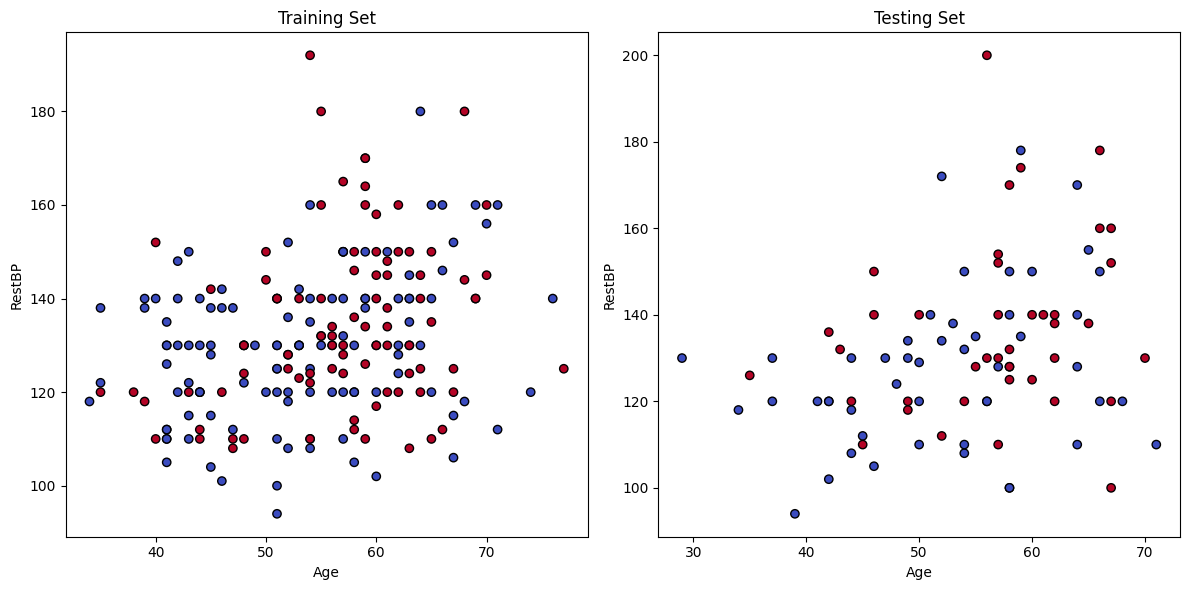

In [5]:
##3. Plot the training and testing sets using the chosen variables.

# Plot the training and testing sets
plt.figure(figsize=(12, 6))

# Training set
plt.subplot(1, 2, 1)
plt.scatter(X_train['Age'], X_train['RestBP'], c=y_train, cmap='coolwarm', edgecolors='k')
plt.title('Training Set')
plt.xlabel('Age')
plt.ylabel('RestBP')

# Testing set
plt.subplot(1, 2, 2)
plt.scatter(X_test['Age'], X_test['RestBP'], c=y_test, cmap='coolwarm', edgecolors='k')
plt.title('Testing Set')
plt.xlabel('Age')
plt.ylabel('RestBP')
plt.savefig('/content/testing_set.png')
plt.tight_layout()
plt.show()


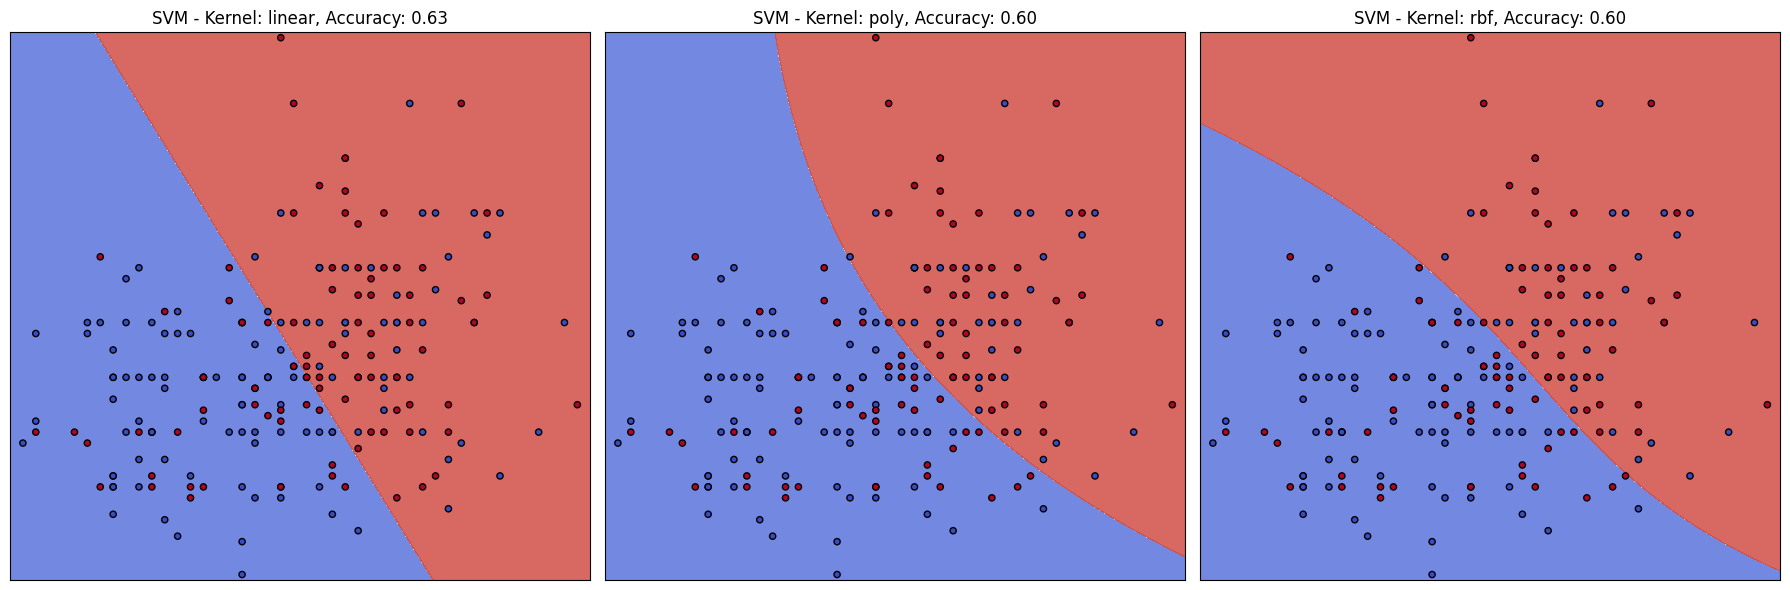

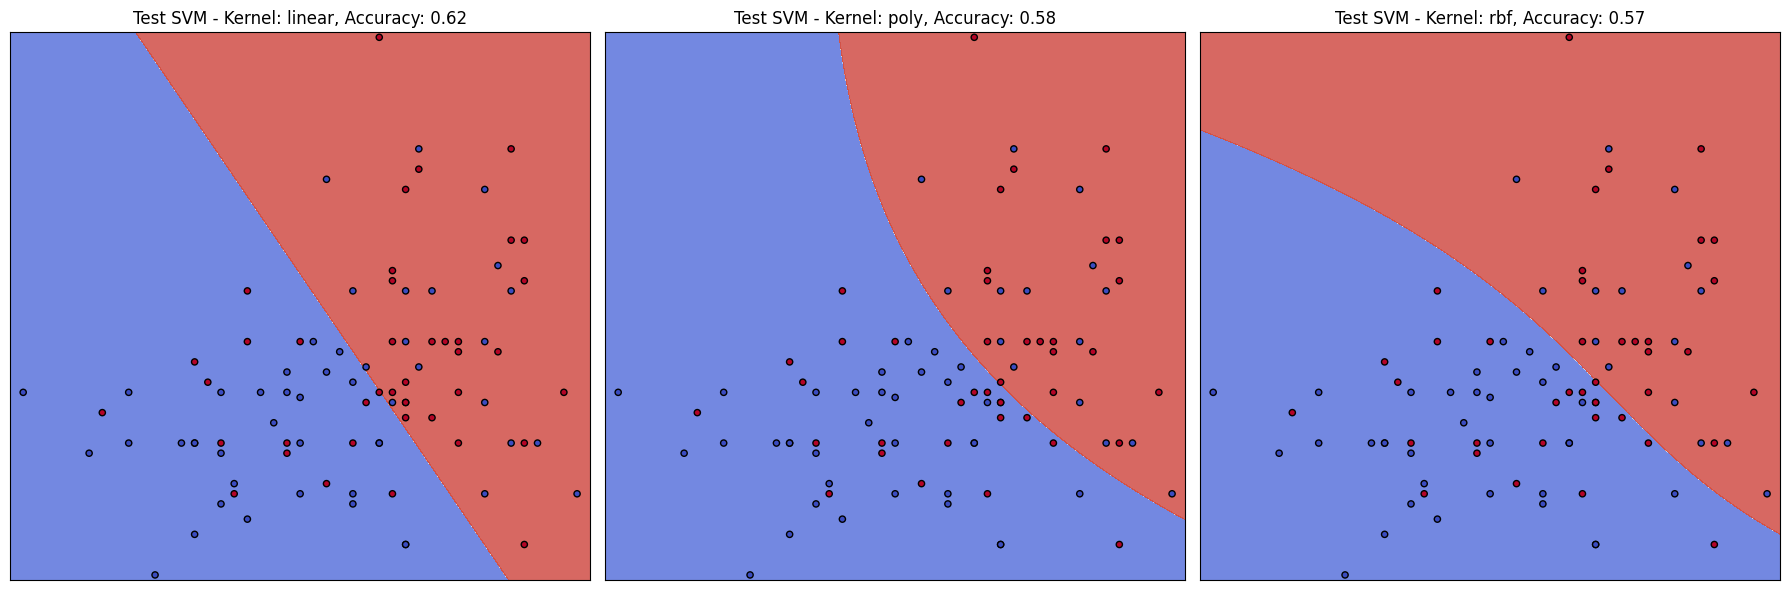

In [6]:
##4. Use the training set to fit an SVM with linear, polynomial, and radial kernels. Adjust the hyperparameters accordingly.
##5. Plot the maximum margin [2] of the training set for each kernel.
##6. Plot the regions and decision boundaries [3] of the training set for each kernel.
##7. Estimate the heart disease (AHD) on the test set and calculate the accuracy (percentage of success) for each kernel.
##8. Present the plots of the regions and decision boundaries of the test set for each kernel.
##9. OPTIONAL: Define a new SVM model using all the features, repeat the estimation on the test set, and check if the accuracy has improved.

# Function to create the mesh to plot decision regions
def make_meshgrid(X, h=.02):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

# Function to plot decision regions
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Function to train and visualize SVMs
def train_and_plot_svm(X_train, y_train, kernel_type, ax):
    clf = svm.SVC(kernel=kernel_type, C=1.0).fit(X_train, y_train)
    accuracy = clf.score(X_train, y_train)

    X0, X1 = X_train[:, 0], X_train[:, 1]
    xx, yy = make_meshgrid(X_train)

    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(f'SVM - Kernel: {kernel_type}, Accuracy: {accuracy:.2f}')

    return clf

# Prepare the data for the SVM
X_train_np = X_train.values
X_test_np = X_test.values

# Create side-by-side plots for the three kernels
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Train and plot SVMs with the three kernels: linear, polynomial, radial
kernels = ['linear', 'poly', 'rbf']
models = []
for i, kernel in enumerate(kernels):
    models.append(train_and_plot_svm(X_train_np, y_train, kernel, axes[i]))

plt.tight_layout()
plt.savefig('/content/train.png')
plt.show()

# Function to test and plot SVMs on the test set
def plot_test_svm(X_test, y_test, model, ax, kernel_type):
    accuracy = accuracy_score(y_test, model.predict(X_test))

    X0, X1 = X_test[:, 0], X_test[:, 1]
    xx, yy = make_meshgrid(X_test)

    plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(f'Test SVM - Kernel: {kernel_type}, Accuracy: {accuracy:.2f}')

    return accuracy

# Create side-by-side plots for the three kernels on the test set
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot the performance of SVMs on the test set
test_accuracies = []
for i, (model, kernel) in enumerate(zip(models, kernels)):
    test_accuracies.append(plot_test_svm(X_test_np, y_test, model, axes[i], kernel))

plt.tight_layout()
plt.savefig('/content/test.png')
plt.show()